In [7]:
# Grundläggande paket
import numpy as np              # Hantera matriser och vektorer
import pandas as pd             # Hantera data i tabellform
import matplotlib.pyplot as plt # Plotta grafer
import seaborn as sns           # Snygga grafer

# Scikit-learn (för modeller och utvärdering)
from sklearn.datasets import fetch_openml          # Hämta MNIST-data
from sklearn.model_selection import train_test_split # Dela upp data
from sklearn.preprocessing import StandardScaler    # Skala data
from sklearn.neighbors import KNeighborsClassifier  # KNN-modell
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Utvärdering
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


print("Alla paket är importerade och redo att användas!")




Alla paket är importerade och redo att användas!


In [2]:
# Ladda in MNIST-datan från OpenML
mnist = fetch_openml('mnist_784', version=1)

# Separera features (X) och labels (y)
X, y = mnist["data"], mnist["target"]
y = y.astype(int)  # Omvandla y till integer om det är en sträng

print("Data är laddad och klar!")



# Kolla grundläggande info om datan
print(f"Antal bilder: {X.shape[0]}")
print(f"Antal pixlar per bild: {X.shape[1]}")
print(f"Unika klasser: {set(y)}")

# Kolla om det finns några saknade värden
print(f"Saknade värden i X: {X.isnull().sum().sum()}")
print(f"Saknade värden i y: {pd.Series(y).isnull().sum()}")


Data är laddad och klar!
Antal bilder: 70000
Antal pixlar per bild: 784
Unika klasser: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Saknade värden i X: 0
Saknade värden i y: 0


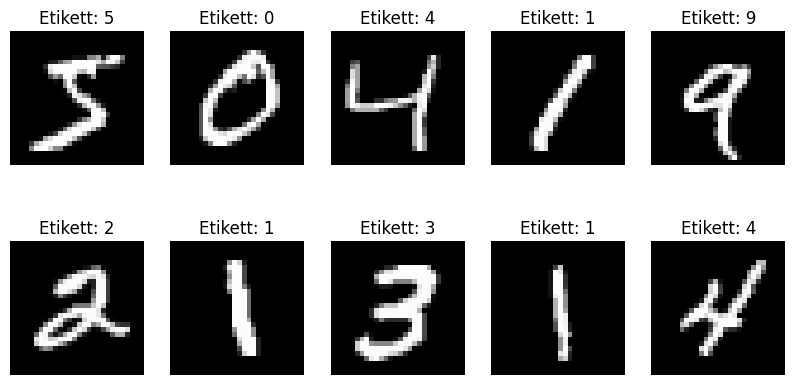

In [3]:
# Plotta några exempelbilder från datan
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap="gray")
    plt.title(f"Etikett: {y.iloc[i]}")
    plt.axis('off')
plt.show()


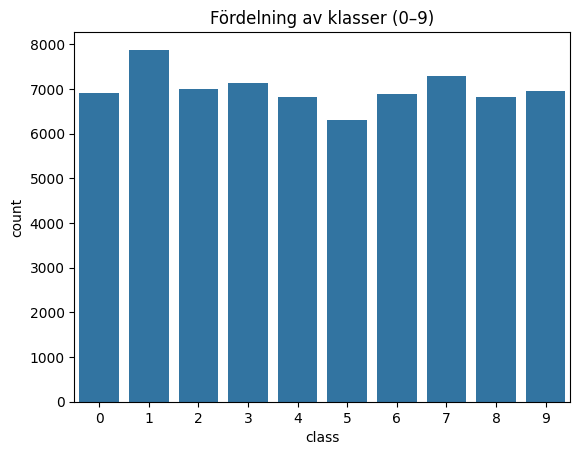

In [4]:
# Visa hur många exempel som finns av varje klass
sns.countplot(x=y)
plt.title("Fördelning av klasser (0–9)")
plt.show()


In [5]:
# Kolla medelvärde och standardavvikelse efter skalning
print(f"Medelvärde för pixelvärden: {X.mean().mean():.4f}")
print(f"Standardavvikelse för pixelvärden: {X.std().mean():.4f}")


Medelvärde för pixelvärden: 33.3860
Standardavvikelse för pixelvärden: 49.2557


In [6]:
# Skala datan
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Första split → 80% träning + 20% (för validering + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Andra split → 10% validering + 10% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Kolla storleken på datan efter uppdelning
print(f'Träningsdata: {X_train.shape}')
print(f'Valideringsdata: {X_val.shape}')
print(f'Testdata: {X_test.shape}')


Träningsdata: (56000, 784)
Valideringsdata: (7000, 784)
Testdata: (7000, 784)


Träffsäkerhet på träningsdata (SVM): 0.9864
Träffsäkerhet på valideringsdata (SVM): 0.9603
Träffsäkerhet på testdata (SVM): 0.9660


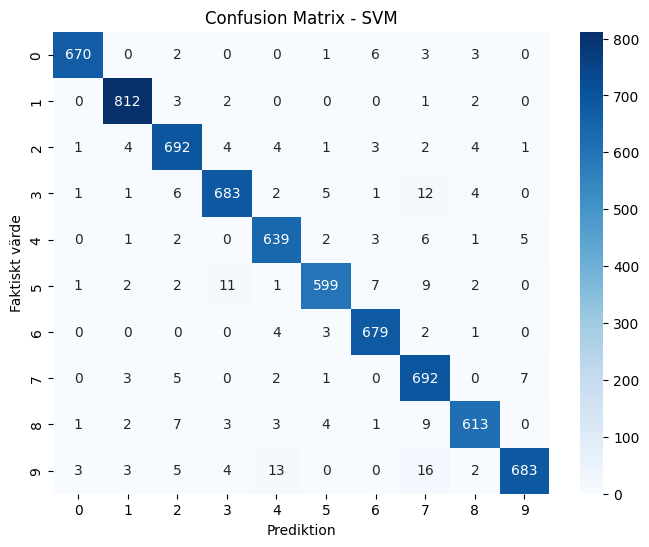

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       685
           1       0.98      0.99      0.99       820
           2       0.96      0.97      0.96       716
           3       0.97      0.96      0.96       715
           4       0.96      0.97      0.96       659
           5       0.97      0.94      0.96       634
           6       0.97      0.99      0.98       689
           7       0.92      0.97      0.95       710
           8       0.97      0.95      0.96       643
           9       0.98      0.94      0.96       729

    accuracy                           0.97      7000
   macro avg       0.97      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000



In [18]:

# Skapa en SVM-modell med RBF-kärna
svm = SVC(kernel='rbf', C=1, random_state=42)

# Träna modellen på skalad träningsdata
svm.fit(X_train, y_train)

# Utvärdera på träningsdata
y_train_pred_svm = svm.predict(X_train)
train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
print(f"Träffsäkerhet på träningsdata (SVM): {train_acc_svm:.4f}")

# Utvärdera på valideringsdata
y_val_pred_svm = svm.predict(X_val)
val_acc_svm = accuracy_score(y_val, y_val_pred_svm)
print(f"Träffsäkerhet på valideringsdata (SVM): {val_acc_svm:.4f}")

# Utvärdera på testdata
y_test_pred_svm = svm.predict(X_test)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Träffsäkerhet på testdata (SVM): {test_acc_svm:.4f}")

# Confusion matrix för testdatan
cm_svm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Prediktion")
plt.ylabel("Faktiskt värde")
plt.title("Confusion Matrix - SVM")
plt.show()

# Klassificeringsrapport
print(classification_report(y_test, y_test_pred_svm))


Träffsäkerhet på träningsdata (MLP): 0.9995
Träffsäkerhet på valideringsdata (MLP): 0.9743
Träffsäkerhet på testdata (MLP): 0.9781


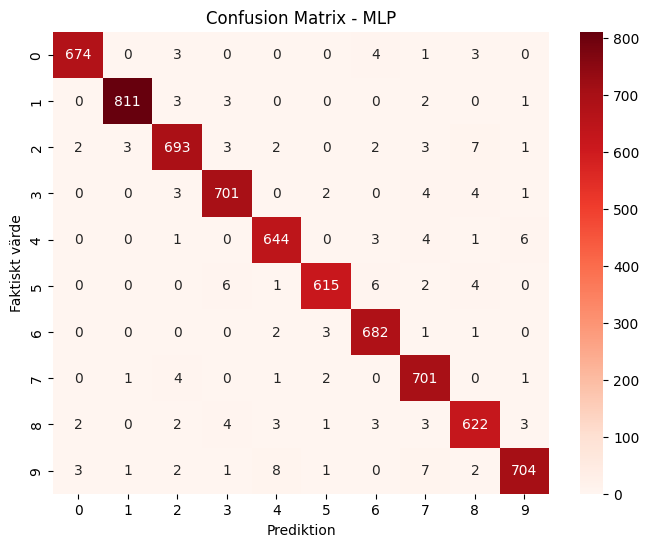

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       685
           1       0.99      0.99      0.99       820
           2       0.97      0.97      0.97       716
           3       0.98      0.98      0.98       715
           4       0.97      0.98      0.98       659
           5       0.99      0.97      0.98       634
           6       0.97      0.99      0.98       689
           7       0.96      0.99      0.97       710
           8       0.97      0.97      0.97       643
           9       0.98      0.97      0.97       729

    accuracy                           0.98      7000
   macro avg       0.98      0.98      0.98      7000
weighted avg       0.98      0.98      0.98      7000



In [17]:

# Skapa en MLP-modell med två dolda lager (128 och 64 neuroner)
mlp = MLPClassifier(hidden_layer_sizes=(128),  # Två dolda lager med 128 och 64 neuroner
                    activation='relu',         # ReLU aktiveringsfunktion
                    solver='adam',             # Adam optimizer
                    alpha=0.1,                 # Regularisering → Förhindra överträning
                    learning_rate_init=0.0005, # Lägre learning rate → Stabil träning
                    max_iter=100,              # Fler träningsrundor → Mer tid att lära sig
                    random_state=42,)
                                
# Träna modellen på skalad träningsdata
mlp.fit(X_train, y_train)

# Utvärdera på träningsdata
y_train_pred_mlp = mlp.predict(X_train)
train_acc_mlp = accuracy_score(y_train, y_train_pred_mlp)
print(f"Träffsäkerhet på träningsdata (MLP): {train_acc_mlp:.4f}")

# Utvärdera på valideringsdata
y_val_pred_mlp = mlp.predict(X_val)
val_acc_mlp = accuracy_score(y_val, y_val_pred_mlp)
print(f"Träffsäkerhet på valideringsdata (MLP): {val_acc_mlp:.4f}")

# Utvärdera på testdata
y_test_pred_mlp = mlp.predict(X_test)
test_acc_mlp = accuracy_score(y_test, y_test_pred_mlp)
print(f"Träffsäkerhet på testdata (MLP): {test_acc_mlp:.4f}")

# Confusion matrix för testdatan
cm_mlp = confusion_matrix(y_test, y_test_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Reds", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Prediktion")
plt.ylabel("Faktiskt värde")
plt.title("Confusion Matrix - MLP")
plt.show()

# Visa precision, recall och F1-score
print(classification_report(y_test, y_test_pred_mlp))



Träffsäkerhet på träningsdata (KNN): 0.9631
Träffsäkerhet på valideringsdata (KNN): 0.9453
Träffsäkerhet på testdata (KNN): 0.9470


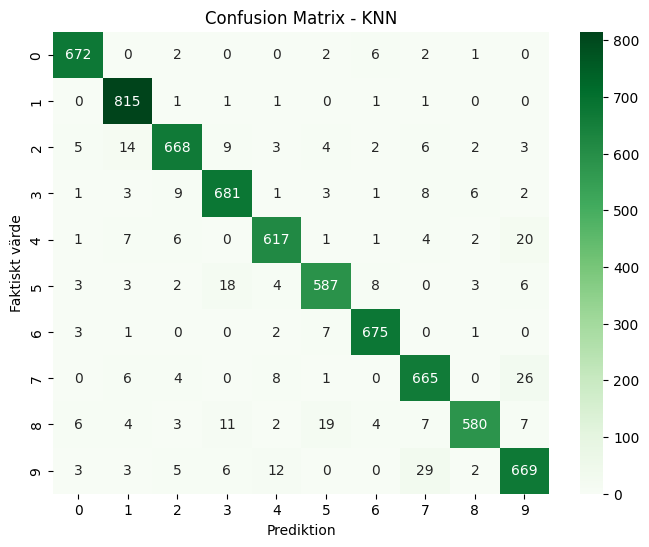

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       685
           1       0.95      0.99      0.97       820
           2       0.95      0.93      0.94       716
           3       0.94      0.95      0.95       715
           4       0.95      0.94      0.94       659
           5       0.94      0.93      0.93       634
           6       0.97      0.98      0.97       689
           7       0.92      0.94      0.93       710
           8       0.97      0.90      0.94       643
           9       0.91      0.92      0.92       729

    accuracy                           0.95      7000
   macro avg       0.95      0.95      0.95      7000
weighted avg       0.95      0.95      0.95      7000



In [14]:

# Skapa en KNN-modell med k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Träna modellen på oskalad träningsdata
knn.fit(X_train, y_train)

# Utvärdera på träningsdata
y_train_pred_knn = knn.predict(X_train)
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
print(f"Träffsäkerhet på träningsdata (KNN): {train_acc_knn:.4f}")

# Utvärdera på valideringsdata
y_val_pred_knn = knn.predict(X_val)
val_acc_knn = accuracy_score(y_val, y_val_pred_knn)
print(f"Träffsäkerhet på valideringsdata (KNN): {val_acc_knn:.4f}")

# Utvärdera på testdata
y_test_pred_knn = knn.predict(X_test)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"Träffsäkerhet på testdata (KNN): {test_acc_knn:.4f}")

# Confusion matrix för testdatan
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Prediktion")
plt.ylabel("Faktiskt värde")
plt.title("Confusion Matrix - KNN")
plt.show()

print(classification_report(y_test, y_test_pred_knn))



Träffsäkerhet på träningsdata (Random Forest): 0.9964
Träffsäkerhet på valideringsdata (Random Forest): 0.9613
Träffsäkerhet på testdata (Random Forest): 0.9644


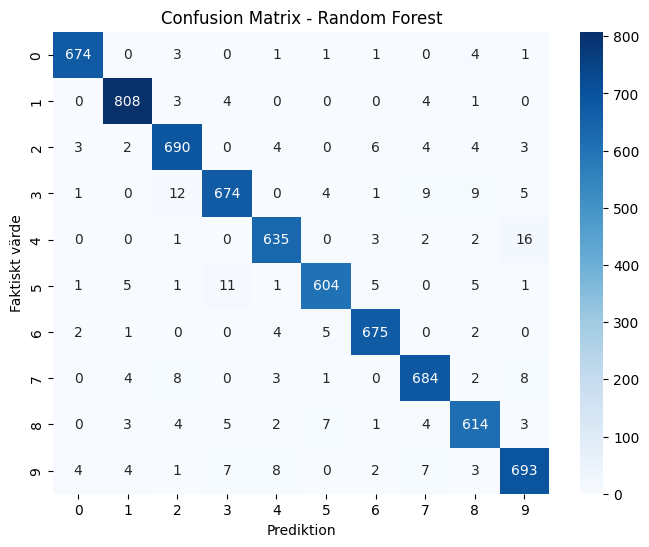

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       685
           1       0.98      0.99      0.98       820
           2       0.95      0.96      0.96       716
           3       0.96      0.94      0.95       715
           4       0.97      0.96      0.96       659
           5       0.97      0.95      0.96       634
           6       0.97      0.98      0.98       689
           7       0.96      0.96      0.96       710
           8       0.95      0.95      0.95       643
           9       0.95      0.95      0.95       729

    accuracy                           0.96      7000
   macro avg       0.96      0.96      0.96      7000
weighted avg       0.96      0.96      0.96      7000



In [19]:

# Skapa en Random Forest-modell med 100 träd
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=15,               # Maxdjup för att förhindra överträning
                            min_samples_split=5,        # Minsta antal prover för att dela en nod
                            random_state=42)

# Träna modellen på träningsdata
rf.fit(X_train, y_train)

# ======= Utvärdera på träningsdata =======
y_train_pred_rf = rf.predict(X_train)
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Träffsäkerhet på träningsdata (Random Forest): {train_acc_rf:.4f}")

# ======= Utvärdera på valideringsdata =======
y_val_pred_rf = rf.predict(X_val)
val_acc_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Träffsäkerhet på valideringsdata (Random Forest): {val_acc_rf:.4f}")

# ======= Utvärdera på testdata =======
y_test_pred_rf = rf.predict(X_test)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Träffsäkerhet på testdata (Random Forest): {test_acc_rf:.4f}")

# ======= Confusion Matrix =======
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Prediktion")
plt.ylabel("Faktiskt värde")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ======= Visa precision, recall och F1-score =======
print(classification_report(y_test, y_test_pred_rf))






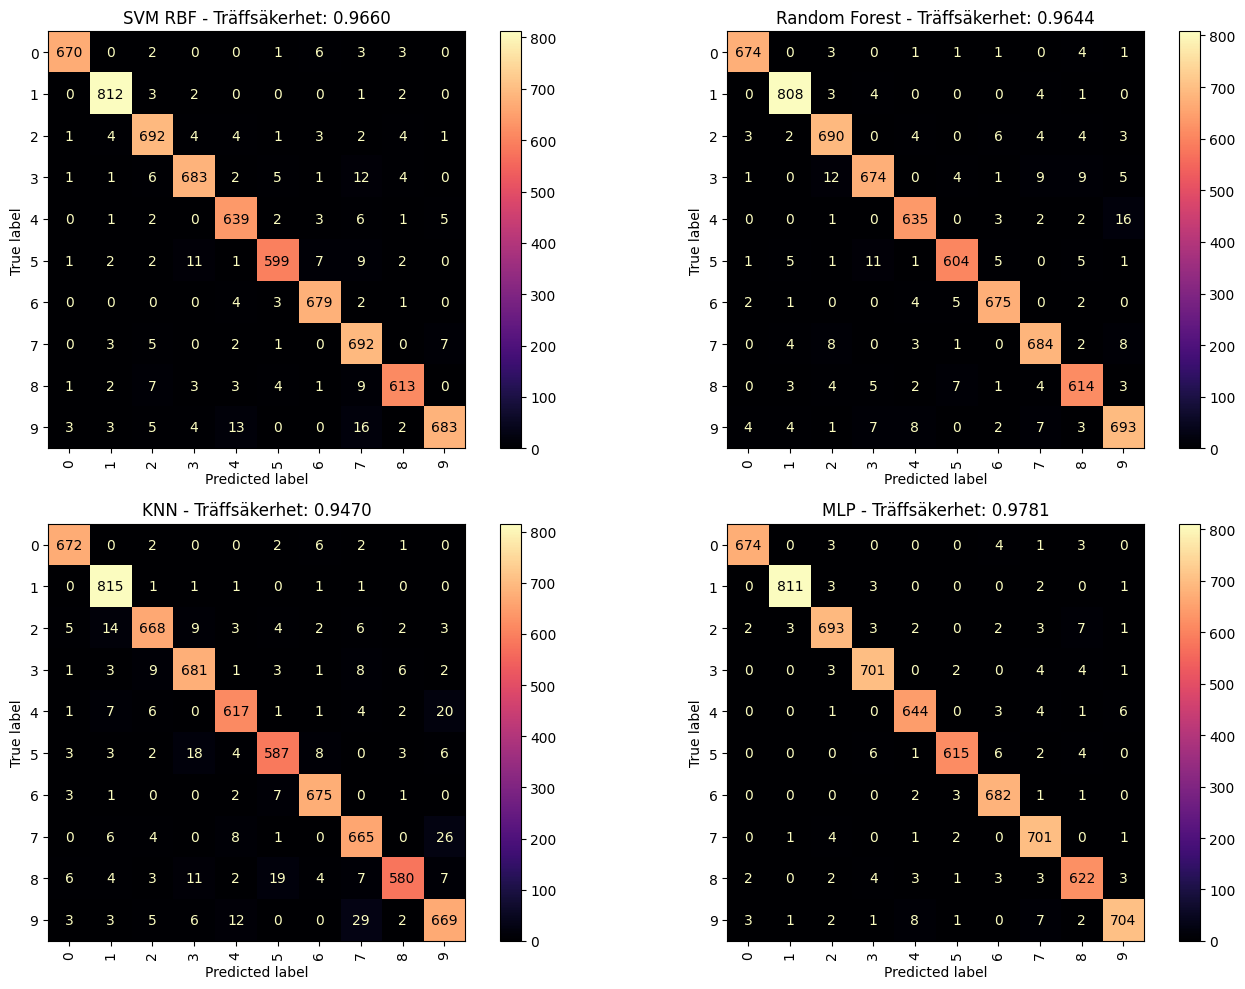

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# ======= Lista över tränade modeller =======
modeller = {
    "SVM RBF": svm,
    "Random Forest": rf,
    "KNN": knn,
    "MLP": mlp
}

# ======= Antal rader och kolumner i plotten =======
antal_modeller = len(modeller)
kolumner = 2
rader = (antal_modeller // kolumner) + (1 if antal_modeller % kolumner != 0 else 0)
fig, ax = plt.subplots(rader, kolumner, figsize=(14, 5 * rader))

# ======= Loop för att plotta confusion matrix =======
for i, (namn, modell) in enumerate(modeller.items()):
    # Gör en prediktion på testdata (alla modeller använder samma skalade data)
    y_pred = modell.predict(X_test)
    
    # Skapa confusion matrix + noggrannhet
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Hitta rätt plats i subplot
    rad = i // kolumner
    kol = i % kolumner
    ax_i = ax[rad, kol] if rader > 1 else ax[kol]
    
    # Plotta confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax_i, cmap="magma", xticks_rotation="vertical", values_format="d")
    ax_i.set_title(f"{namn} - Träffsäkerhet: {accuracy:.4f}")

# ======= Layout och visning =======
plt.tight_layout()
plt.show()

In [ ]:
import joblib
import os

# Skapa en dictionary med tränade modeller
modeller = {
    "SVM RBF": svm,
    "Random Forest": rf,
    "KNN": knn,
    "MLP (Förbättrad)": mlp
}

# Loopa igenom modellerna och visa minnesanvändning
print("\nMinnesstorlek för varje modell:\n" + "-" * 40)
for namn, modell in modeller.items():
    # Spara modellen till en temporär fil med joblib och mät storleken
    joblib.dump(modell, "temp_model.joblib")
    storlek = os.path.getsize("temp_model.joblib") / (1024 * 1024)  # Omvandla bytes till MB
    print(f"{namn}: {storlek:.2f} MB")

# Ta bort den temporära filen efter mätning
os.remove("temp_model.joblib")


In [ ]:
import joblib
import os

# Skapa mapp om den inte finns
os.makedirs("streamlit_app", exist_ok=True)

# Spara MLP-modellen
joblib.dump(mlp, "streamlit_app/mlp_model.joblib")

# Spara testdata
joblib.dump(X_test, "streamlit_app/X_test.joblib")
joblib.dump(y_test, "streamlit_app/y_test.joblib")

print("MLP-modellen och testdata är sparade!")
